<a id='top'></a>

## User Experience Analysis of Tellco Telecommunications

#### Tables of Content

<html>
    <ul>
        <li><a href='#intro'>Introduction</a></li>
        <li><a href='#obj'>Objective</a></li>
        <li><a href= '#research'/>Research Questions<a/></li>        
        <li><a href= '#ana'>Analysis<a/><li.>
              <br/>
            <ul>
             <li><a href='#lib'>Libraries</a></li>  
             <li><a href='#fe'>Feature Selection</a></li>
             </ul>
            <ol>
            <li><a href='#r1'>Research Question 1</a></li>
             <li><a href='#r2'>Research Question 2</a></li>
             <li><a href='#r3'>Research Question 3</a></li>
            </ol>
        <li><a href= '#go'>General Observation<a/></li>
        <li><a href= '#rc'>Recommendation & Conclusions<a/></li>
        <li><a href= '#lim'>Limitations<a/></li>
        <li><a href= '#ref'>Referecnes<a/></li>
    </ul>
</html>

<a id='intro'></a>
#### Introduction

The Telecommunication industry has experienced a great revolution since the last decade. 
Mobile devices have become the new fashion trend and play a vital role in
everyone's life. The success of the mobile industry is by and large dependent on its
consumers. 

Therefore, it is necessary for the vendors to focus on their target audience
i.e. what are the needs and requirements of their consumers and how they feel and
perceive their products. Tracking & evaluation of customers’ experience can help the
organizations to optimize their products and services so that it meets the evolving user
expectations, needs, and acceptance.

In the telecommunication industry, the user experience is related, most of the time, to
network parameter performances or the customers’ device characteristics.

<a id='obj'></a>

#### Objective

In this section, I woulf be focusing on network parameters like ​TCP retransmission​,
Round Trip Time (RTT)​, ​Throughput​, and the customers’ device characteristics like the
handset type to conduct a deep user experience analysis. 

The network parameters are
all columns in the dataset. The following questions are your guidance to complete the
task.

<a id='ana'></a>

#### Analyis

<a id='lib'></a>
##### Libraries

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from  scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

Load data

In [115]:
path = '../datasets/cleaned/cleanWk2_data.csv'
data = pd.read_csv(path)

In [116]:
data

,bearer_id,start,start_ms,end,end_ms,imsi,msisdn_number,imei,last_location_name,avg_rtt_dl__ms_,...,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_
0,13114483460844900352,2019-04-04 12:01:18,770.0000,2019-04-25 14:35:31,662.00000,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.000000,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,13114483482878900224,2019-04-09 13:04:04,235.0000,2019-04-25 08:15:48,606.00000,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,13114483484080500736,2019-04-09 17:42:11,1.0000,2019-04-25 11:58:13,652.00000,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,46.991676,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,13114483485442799616,2019-04-10 00:31:25,486.0000,2019-04-25 07:36:35,171.00000,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,46.991676,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,13114483499480700928,2019-04-12 20:10:23,565.0000,2019-04-25 10:40:32,954.00000,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,46.991676,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0000,2019-04-30 06:02:33,214.00000,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,32.000000,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7349883264234609664,2019-04-29 07:28:42,483.0000,2019-04-30 10:41:33,187.00000,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,27.000000,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,13114483573367300096,2019-04-29 07:28:43,283.0000,2019-04-30 10:46:12,810.00000,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,43.000000,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,13114483573367300096,2019-04-29 07:28:43,696.0000,2019-04-30 10:40:34,327.00000,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,37.000000,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


<a id='research'></a>

#### Research Questions

##### Research Question 1

- Customer Aggregation
    
- -        Aggregate, per customer, the following information 

            1. Average TCP retransmission

            2. Average RTT

           3. Handset type

           4. Average throughput

##### Research Question 2

- Customer Ranking

- - Compute & list 10 of the top, bottom and most frequent :
                
                a. TCP values in the dataset.
                b. RTT values in the dataset.
                c. Throughput values in the dataset.
                d. The distribution of the average throughput per handset type and provide
                interpretation for your findings.
                e. The average TCP retransmission view per handset type and provide
                interpretation for your findings.


##### Research Question 3

- Customer Clustering

- - Using the experience metrics above, perform a ​ k-​ means clustering (where ​ k =3) 

    to segment users into groups of experiences and provide a brief description of each cluster.




#### Feature Selection

In [117]:
data.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'imsi',
       'msisdn_number', 'imei', 'last_location_name', 'avg_rtt_dl__ms_',
       'avg_rtt_ul__ms_', 'avg_bearer_tp_dl__kbps_', 'avg_bearer_tp_ul__kbps_',
       'tcp_dl_retrans__vol__bytes_', 'tcp_ul_retrans__vol__bytes_',
       'dl_tp_<_50_kbps__%_', '50_kbps_<_dl_tp_<_250_kbps__%_',
       '250_kbps_<_dl_tp_<_1_mbps__%_', 'dl_tp_>_1_mbps__%_',
       'ul_tp_<_10_kbps__%_', '10_kbps_<_ul_tp_<_50_kbps__%_',
       '50_kbps_<_ul_tp_<_300_kbps__%_', 'ul_tp_>_300_kbps__%_',
       'http_dl__bytes_', 'http_ul__bytes_', 'activity_duration_dl__ms_',
       'activity_duration_ul__ms_', 'dur___ms__1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
       'nb_of

In [118]:
# features to use
working_features = ['bearer_id','imsi',
       'msisdn_number', 'imei', 'avg_rtt_dl__ms_',
                    
       'avg_rtt_ul__ms_', 'avg_bearer_tp_dl__kbps_', 'avg_bearer_tp_ul__kbps_',
                    
       'tcp_dl_retrans__vol__bytes_', 'tcp_ul_retrans__vol__bytes_',  'handset_manufacturer',
       'handset_type','total_ul__bytes_', 'total_dl__bytes_' ]

In [119]:
data2 = data[working_features]

In [120]:
data2

,bearer_id,imsi,msisdn_number,imei,avg_rtt_dl__ms_,avg_rtt_ul__ms_,avg_bearer_tp_dl__kbps_,avg_bearer_tp_ul__kbps_,tcp_dl_retrans__vol__bytes_,tcp_ul_retrans__vol__bytes_,handset_manufacturer,handset_type,total_ul__bytes_,total_dl__bytes_
0,13114483460844900352,2.082014e+14,3.366496e+10,3.552121e+13,42.000000,5.000000,23.000000,44.000000,1.203618e+06,31947.60397,samsung,samsung galaxy a5 sm-a520f,3.674974e+07,3.088796e+08
1,13114483482878900224,2.082019e+14,3.368185e+10,3.579401e+13,65.000000,5.000000,16.000000,26.000000,1.203618e+06,31947.60397,samsung,samsung galaxy j5 (sm-j530),5.380039e+07,6.533850e+08
2,13114483484080500736,2.082003e+14,3.376063e+10,3.528151e+13,46.991676,7.621414,6.000000,9.000000,1.203618e+06,31947.60397,samsung,samsung galaxy a8 (2018),2.788364e+07,2.798073e+08
3,13114483485442799616,2.082014e+14,3.375034e+10,3.535661e+13,46.991676,7.621414,44.000000,44.000000,1.203618e+06,31947.60397,undefined,undefined,4.332422e+07,8.460285e+08
4,13114483499480700928,2.082014e+14,3.369980e+10,3.540701e+13,46.991676,7.621414,6.000000,9.000000,1.203618e+06,31947.60397,samsung,samsung sm-g390f,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2.082022e+14,3.365069e+10,3.548311e+13,32.000000,0.000000,52.000000,65.000000,1.203618e+06,31947.60397,apple,apple iphone 8 plus (a1897),5.762885e+07,5.741753e+08
149997,7349883264234609664,2.082019e+14,3.366345e+10,3.566051e+13,27.000000,2.000000,23.000000,54.000000,1.203618e+06,31947.60397,apple,apple iphone se (a1723),3.913508e+07,6.666488e+08
149998,13114483573367300096,2.082017e+14,3.362189e+10,3.572121e+13,43.000000,6.000000,43.000000,47.000000,1.203618e+06,31947.60397,apple,apple iphone xs (a2097),3.491222e+07,5.927864e+08
149999,13114483573367300096,2.082021e+14,3.361962e+10,8.618620e+13,37.000000,5.000000,34.000000,37.000000,1.203618e+06,31947.60397,huawei,huawei fig-lx1,2.962610e+07,3.718959e+08


> Compute UL + DL of each arameters as total 

In [121]:
working_data = pd.DataFrame()

In [122]:
working_data['bearer_id'] = data2.bearer_id
working_data['imsi'] = data2.imsi
working_data['msisdn_number'] = data2.msisdn_number
working_data['imei'] = data2.imei
working_data['avg_rtt_ms'] = data2.avg_rtt_dl__ms_ + data2.avg_rtt_ul__ms_
working_data['avg_bearer_tp_kbps'] = data2.avg_bearer_tp_dl__kbps_ + data2.avg_bearer_tp_ul__kbps_
working_data['total_tcp_retrans__vol__bytes_'] = data2.tcp_dl_retrans__vol__bytes_ + data2.tcp_ul_retrans__vol__bytes_
working_data['handset_manufacturer'] = data2.handset_manufacturer
working_data['handset_type'] = data2.handset_type
working_data['totalXdr'] = data2.total_dl__bytes_ + data2.total_ul__bytes_

In [123]:
working_data

,bearer_id,imsi,msisdn_number,imei,avg_rtt_ms,avg_bearer_tp_kbps,total_tcp_retrans__vol__bytes_,handset_manufacturer,handset_type,totalXdr
0,13114483460844900352,2.082014e+14,3.366496e+10,3.552121e+13,47.00000,67.00000,1.235566e+06,samsung,samsung galaxy a5 sm-a520f,3.456294e+08
1,13114483482878900224,2.082019e+14,3.368185e+10,3.579401e+13,70.00000,42.00000,1.235566e+06,samsung,samsung galaxy j5 (sm-j530),7.071854e+08
2,13114483484080500736,2.082003e+14,3.376063e+10,3.528151e+13,54.61309,15.00000,1.235566e+06,samsung,samsung galaxy a8 (2018),3.076910e+08
3,13114483485442799616,2.082014e+14,3.375034e+10,3.535661e+13,54.61309,88.00000,1.235566e+06,undefined,undefined,8.893527e+08
4,13114483499480700928,2.082014e+14,3.369980e+10,3.540701e+13,54.61309,15.00000,1.235566e+06,samsung,samsung sm-g390f,6.076814e+08
...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2.082022e+14,3.365069e+10,3.548311e+13,32.00000,117.00000,1.235566e+06,apple,apple iphone 8 plus (a1897),6.318041e+08
149997,7349883264234609664,2.082019e+14,3.366345e+10,3.566051e+13,29.00000,77.00000,1.235566e+06,apple,apple iphone se (a1723),7.057839e+08
149998,13114483573367300096,2.082017e+14,3.362189e+10,3.572121e+13,49.00000,90.00000,1.235566e+06,apple,apple iphone xs (a2097),6.276986e+08
149999,13114483573367300096,2.082021e+14,3.361962e+10,8.618620e+13,42.00000,71.00000,1.235566e+06,huawei,huawei fig-lx1,4.015220e+08


In [124]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       150001 non-null  object 
 1   imsi                            150001 non-null  float64
 2   msisdn_number                   150001 non-null  float64
 3   imei                            150001 non-null  float64
 4   avg_rtt_ms                      150001 non-null  float64
 5   avg_bearer_tp_kbps              150001 non-null  float64
 6   total_tcp_retrans__vol__bytes_  150001 non-null  float64
 7   handset_manufacturer            150001 non-null  object 
 8   handset_type                    150001 non-null  object 
 9   totalXdr                        150001 non-null  float64
dtypes: float64(7), object(3)
memory usage: 11.4+ MB


> convert imsi, imei and, msisdn_number to object data type

In [125]:
working_data.imsi=working_data.imsi.astype('object')

In [126]:
working_data.imei=working_data.imei.astype('object')

In [127]:
working_data.msisdn_number = working_data.msisdn_number.astype('object')

In [128]:
working_data.dtypes

bearer_id                          object
imsi                               object
msisdn_number                      object
imei                               object
avg_rtt_ms                        float64
avg_bearer_tp_kbps                float64
total_tcp_retrans__vol__bytes_    float64
handset_manufacturer               object
handset_type                       object
totalXdr                          float64
dtype: object

In [129]:
working_data.isnull().any()

bearer_id                         False
imsi                              False
msisdn_number                     False
imei                              False
avg_rtt_ms                        False
avg_bearer_tp_kbps                False
total_tcp_retrans__vol__bytes_    False
handset_manufacturer              False
handset_type                      False
totalXdr                          False
dtype: bool

#### Detect & Treat outliers

In [130]:
numeric_data = working_data.select_dtypes(include='number')

In [131]:
numeric_data

,avg_rtt_ms,avg_bearer_tp_kbps,total_tcp_retrans__vol__bytes_,totalXdr
0,47.00000,67.00000,1.235566e+06,3.456294e+08
1,70.00000,42.00000,1.235566e+06,7.071854e+08
2,54.61309,15.00000,1.235566e+06,3.076910e+08
3,54.61309,88.00000,1.235566e+06,8.893527e+08
4,54.61309,15.00000,1.235566e+06,6.076814e+08
...,...,...,...,...
149996,32.00000,117.00000,1.235566e+06,6.318041e+08
149997,29.00000,77.00000,1.235566e+06,7.057839e+08
149998,49.00000,90.00000,1.235566e+06,6.276986e+08
149999,42.00000,71.00000,1.235566e+06,4.015220e+08


> Plot outliers with scatter and histogram

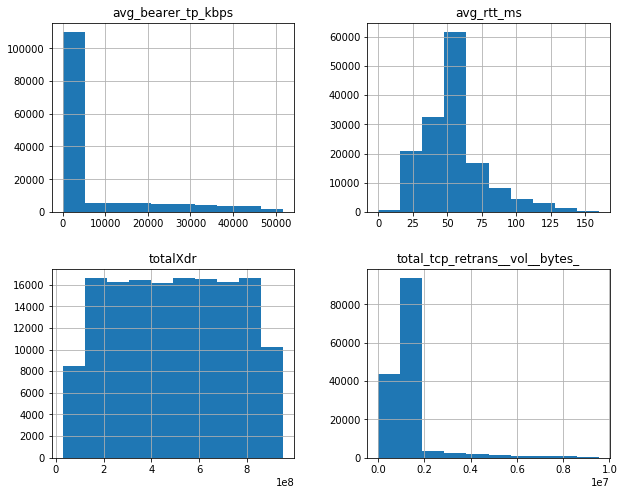

In [132]:
numeric_data.hist(figsize=(10,8), bins=10);

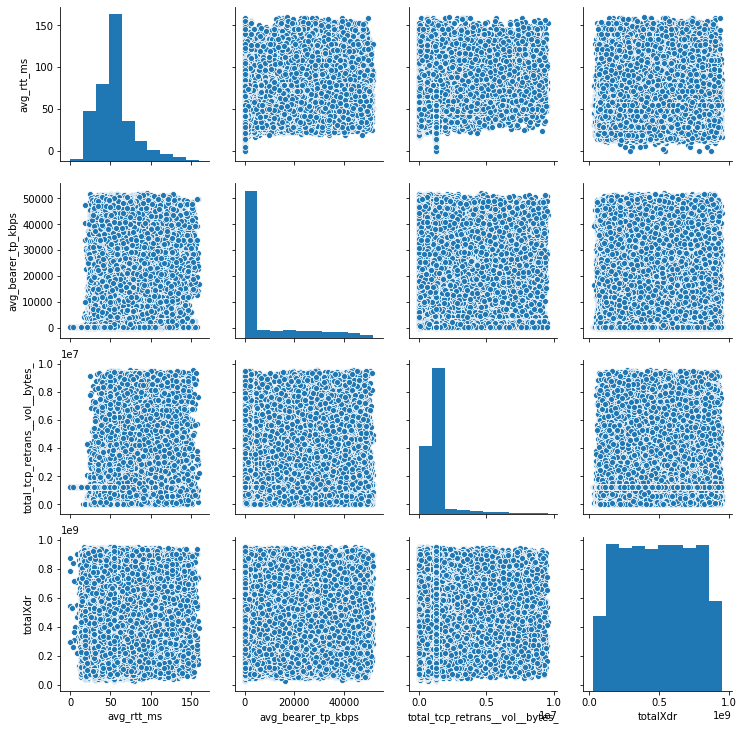

In [133]:
sns.pairplot(numeric_data)

From the above, we can see that some of these columns contain few outlier values

The data wrangling notebook actually helped deal with most of hte outlier figures

> We can also detect using the IQR method...

In [134]:
Q1 = working_data.quantile(0.25)
Q3 = working_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

avg_rtt_ms                        2.200000e+01
avg_bearer_tp_kbps                7.420000e+03
total_tcp_retrans__vol__bytes_    6.155038e+05
totalXdr                          4.220658e+08
dtype: float64


> get columns with outlier values

In [135]:
(((working_data < (Q1 - 1.5 * IQR)) |(working_data > (Q3 + 1.5 * IQR)))==True).any()

avg_bearer_tp_kbps                 True
avg_rtt_ms                         True
bearer_id                         False
handset_manufacturer              False
handset_type                      False
imei                              False
imsi                              False
msisdn_number                     False
totalXdr                          False
total_tcp_retrans__vol__bytes_     True
dtype: bool

We would replace outliers in the dataset with the mean of outlier columns

In [136]:
def outlier_replace(df, cols):
    for col in cols:
        df[cols] = np.where(((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))), df[cols].mean(), df[cols])

In [137]:
outlier_replace(working_data, numeric_data.columns.to_list())

> Test for outlier values agaain

In [138]:
(((working_data < (Q1 - 1.5 * IQR)) |(working_data > (Q3 + 1.5 * IQR)))==True).any()

avg_bearer_tp_kbps                False
avg_rtt_ms                        False
bearer_id                         False
handset_manufacturer              False
handset_type                      False
imei                              False
imsi                              False
msisdn_number                     False
totalXdr                          False
total_tcp_retrans__vol__bytes_    False
dtype: bool

In [139]:
numeric_data = working_data.select_dtypes(include='number')

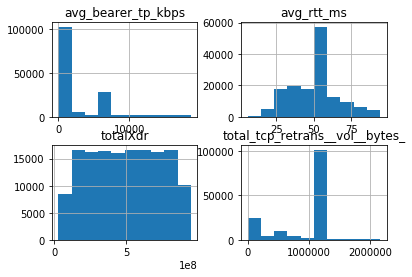

In [140]:
numeric_data.hist();

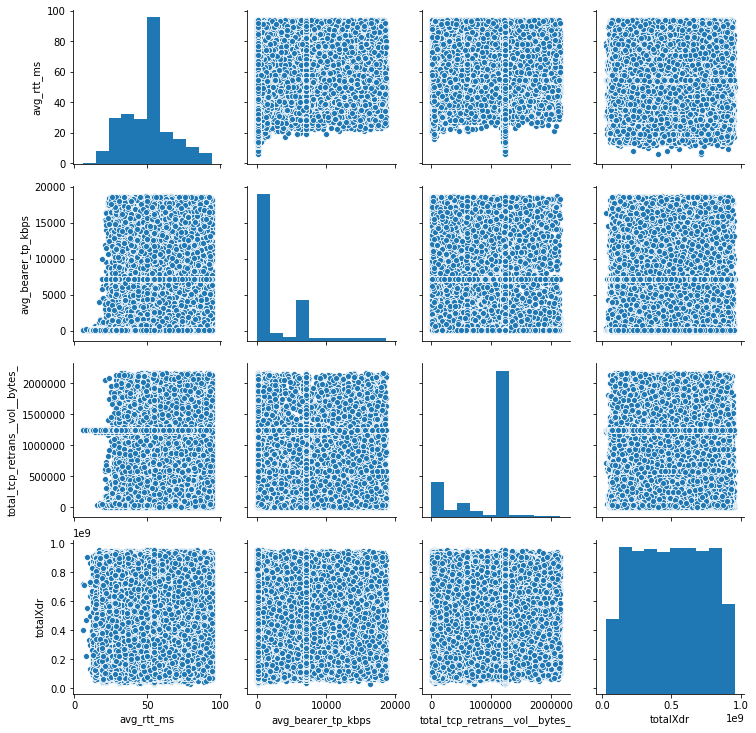

In [141]:
sns.pairplot(numeric_data)

> From the above, outlier values have been dealt with to a larger extent

In [142]:
working_data.isnull().any()

bearer_id                         False
imsi                              False
msisdn_number                     False
imei                              False
avg_rtt_ms                        False
avg_bearer_tp_kbps                False
total_tcp_retrans__vol__bytes_    False
handset_manufacturer              False
handset_type                      False
totalXdr                          False
dtype: bool

We have no missing values. This has been handled in the wrangling notebook

> Now that we have confirmed we have a clean data, we can go ahead to perform our analysis

##### Research Question 1

- Customer Aggregation
    
- -        Aggregate, per customer, the following information 

            1. Average TCP retransmission

            2. Average RTT

           3. Handset typ

In [143]:
working_data

,bearer_id,imsi,msisdn_number,imei,avg_rtt_ms,avg_bearer_tp_kbps,total_tcp_retrans__vol__bytes_,handset_manufacturer,handset_type,totalXdr
0,13114483460844900352,2.08201e+14,3.3665e+10,3.55212e+13,47.00000,67.00000,1.235566e+06,samsung,samsung galaxy a5 sm-a520f,3.456294e+08
1,13114483482878900224,2.08202e+14,3.36819e+10,3.5794e+13,70.00000,42.00000,1.235566e+06,samsung,samsung galaxy j5 (sm-j530),7.071854e+08
2,13114483484080500736,2.082e+14,3.37606e+10,3.52815e+13,54.61309,15.00000,1.235566e+06,samsung,samsung galaxy a8 (2018),3.076910e+08
3,13114483485442799616,2.08201e+14,3.37503e+10,3.53566e+13,54.61309,88.00000,1.235566e+06,undefined,undefined,8.893527e+08
4,13114483499480700928,2.08201e+14,3.36998e+10,3.5407e+13,54.61309,15.00000,1.235566e+06,samsung,samsung sm-g390f,6.076814e+08
...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2.08202e+14,3.36507e+10,3.54831e+13,32.00000,117.00000,1.235566e+06,apple,apple iphone 8 plus (a1897),6.318041e+08
149997,7349883264234609664,2.08202e+14,3.36634e+10,3.56605e+13,29.00000,77.00000,1.235566e+06,apple,apple iphone se (a1723),7.057839e+08
149998,13114483573367300096,2.08202e+14,3.36219e+10,3.57212e+13,49.00000,90.00000,1.235566e+06,apple,apple iphone xs (a2097),6.276986e+08
149999,13114483573367300096,2.08202e+14,3.36196e+10,8.61862e+13,42.00000,71.00000,1.235566e+06,huawei,huawei fig-lx1,4.015220e+08


> Avg RTT

In [144]:
avg_rtt = working_data.groupby('msisdn_number')['avg_rtt_ms'].mean().reset_index(name='avg_rtt')

In [145]:
avg_rtt = avg_rtt.sort_values(by='avg_rtt', ascending=False)

In [146]:
avg_rtt

,msisdn_number,avg_rtt
97505,3.376228e+10,94.0
23994,3.365025e+10,94.0
139,3.360127e+10,94.0
60851,3.366568e+10,94.0
62406,3.366624e+10,94.0
...,...,...
17863,3.363468e+10,10.0
3882,3.361085e+10,9.0
74434,3.367220e+10,9.0
21980,3.364768e+10,8.0


> Avg TCP

In [147]:
avg_tcp = working_data.groupby('msisdn_number')['total_tcp_retrans__vol__bytes_'].mean().reset_index(name='avg_tcp')

In [148]:
avg_tcp = avg_tcp.sort_values(by='avg_tcp', ascending=False)

In [149]:
avg_tcp

,msisdn_number,avg_tcp
61132,3.366576e+10,2157913.0
85844,3.369860e+10,2157600.0
50976,3.366302e+10,2157002.0
7648,3.361681e+10,2156400.0
56703,3.366456e+10,2156077.0
...,...,...
2177,3.360783e+10,143.0
13546,3.362636e+10,134.0
96977,3.376206e+10,129.0
6359,3.361478e+10,128.0


Handset Type

In [150]:
working_data.head(0)

,bearer_id,imsi,msisdn_number,imei,avg_rtt_ms,avg_bearer_tp_kbps,total_tcp_retrans__vol__bytes_,handset_manufacturer,handset_type,totalXdr


In [151]:
handset_type_per_customer = working_data.groupby(['msisdn_number', 'handset_type']).aggregate({'avg_rtt_ms':'mean','avg_bearer_tp_kbps':'mean','total_tcp_retrans__vol__bytes_':'mean'})

In [152]:
handset_type_per_customer=handset_type_per_customer.reset_index()

In [153]:
handset_type_per_customer

,msisdn_number,handset_type,avg_rtt_ms,avg_bearer_tp_kbps,total_tcp_retrans__vol__bytes_
0,3.360100e+10,huawei p20 lite huawei nova 3e,46.00000,76.00000,1.235566e+06
1,3.360100e+10,apple iphone 7 (a1778),31.00000,99.00000,1.235566e+06
2,3.360100e+10,undefined,54.61309,97.00000,1.235566e+06
3,3.360101e+10,apple iphone 5s (a1457),84.00000,248.00000,3.301360e+04
4,3.360101e+10,apple iphone se (a1723),59.50000,3581.02313,1.235566e+06
...,...,...,...,...,...
106959,4.188282e+10,xiaomi communica. redmi 4a,59.00000,420.00000,5.973960e+04
106960,4.188282e+10,zte mf259,33.50000,103.50000,1.246727e+06
106961,3.197021e+12,quectel wireless. quectel ec25-e,54.61309,1.00000,1.235566e+06
106962,3.370000e+14,huawei b525s-23a,54.61309,33.00000,1.235566e+06


##### Research Question 2

- Customer Ranking

- - Compute & list 10 of the top, bottom and most frequent :
                
                a. TCP values in the dataset.
                b. RTT values in the dataset.
                c. Throughput values in the dataset.
                d. The distribution of the average throughput per handset type and provide
                interpretation for your findings.
                e. The average TCP retransmission view per handset type and provide
                interpretation for your findings.


In [154]:
# avg_trp = working_data.groupby('msisdn_number')['avg_bearer_tp_kbps'].mean().reset_index(name='avg_trp')

# avg_trp = avg_trp.sort_values(by='avg_trp', ascending=False)

# avg_trp

#### Top Ten Values

In [155]:
working_data.head(0)

,bearer_id,imsi,msisdn_number,imei,avg_rtt_ms,avg_bearer_tp_kbps,total_tcp_retrans__vol__bytes_,handset_manufacturer,handset_type,totalXdr


1.TCP Values

In [156]:
tcp_values = working_data.total_tcp_retrans__vol__bytes_.reset_index(name='tcp_values').sort_values(by='tcp_values', ascending=False)

In [157]:
top10_tcp = tcp_values.tcp_values.drop_duplicates().nlargest(10).reset_index()

In [158]:
top10_tcp

,index,tcp_values
0,60657,2158218.0
1,66553,2157913.0
2,19795,2157600.0
3,39051,2157594.0
4,78681,2157182.0
5,36054,2157002.0
6,93985,2156400.0
7,117163,2156243.5
8,39745,2156077.0
9,96095,2155857.0


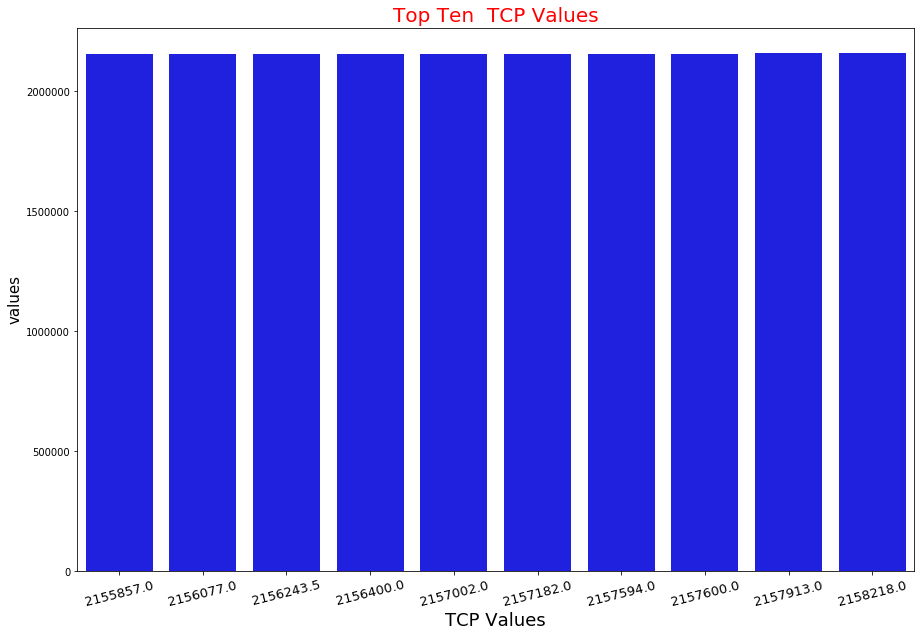

In [159]:
plt.subplots(figsize=(15,10))
sns.barplot(x='tcp_values', y='tcp_values' ,data = top10_tcp, color='b')
plt.title( 'Top Ten  TCP Values', fontsize=20, color='r')
plt.xlabel('TCP Values', fontsize=18)
plt.ylabel('values', fontsize=15)
plt.xticks(fontsize=13, rotation=14)
plt.savefig('visuals/user_experience/top10tcp.png', format='png')

2. RTT Values

In [160]:
rtt_values = working_data.avg_rtt_ms.reset_index(name='rtt_values').sort_values(by='rtt_values', ascending=False)

In [161]:
top10_rtt = rtt_values.rtt_values.drop_duplicates().nlargest(10).reset_index()

In [162]:
top10_rtt

,index,rtt_values
0,59243,94.0
1,139438,93.0
2,117235,92.0
3,138093,91.0
4,116674,90.0
5,30808,89.0
6,20334,88.0
7,120036,87.0
8,118418,86.0
9,92989,85.0


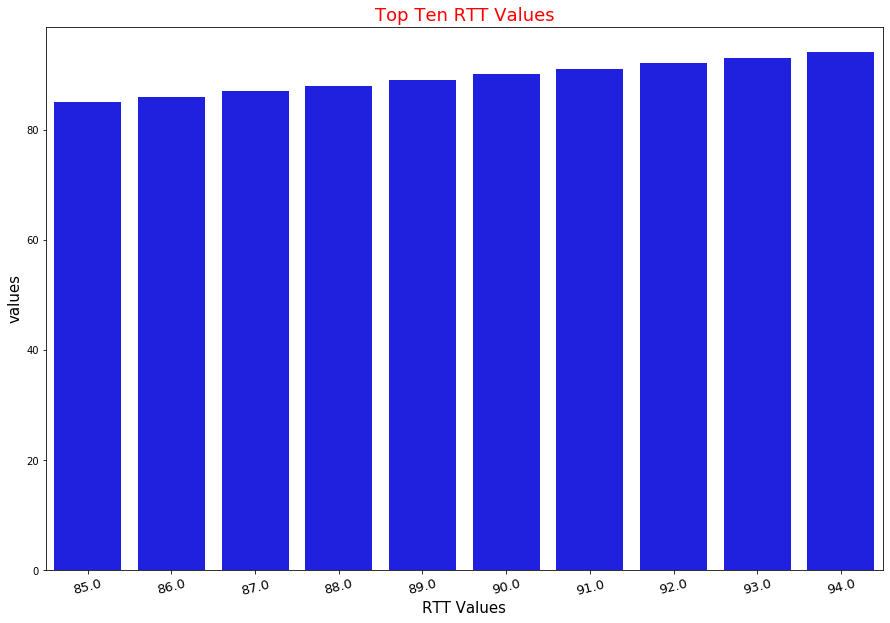

In [163]:
plt.subplots(figsize=(15,10))
sns.barplot(x='rtt_values', y='rtt_values' ,data = top10_rtt, color='b')
plt.title( 'Top Ten RTT Values', fontsize=18, color='r')
plt.xlabel('RTT Values', fontsize=15)
plt.ylabel('values', fontsize=15)
plt.xticks(fontsize=13, rotation=14)
plt.savefig('visuals/user_experience/top10rtt.png', format='png')

3. Throughput Values

In [164]:
tp_values = working_data.avg_bearer_tp_kbps.reset_index(name='tp_values').sort_values(by='tp_values', ascending=False)

In [165]:
top10_tp = tp_values.tp_values.drop_duplicates().nlargest(10).reset_index()

In [166]:
top10_tp

,index,tp_values
0,114733,18639.0
1,21990,18638.0
2,5847,18637.0
3,66866,18635.0
4,100806,18633.0
5,83842,18631.0
6,20575,18630.0
7,96604,18629.0
8,35564,18627.0
9,136991,18626.0


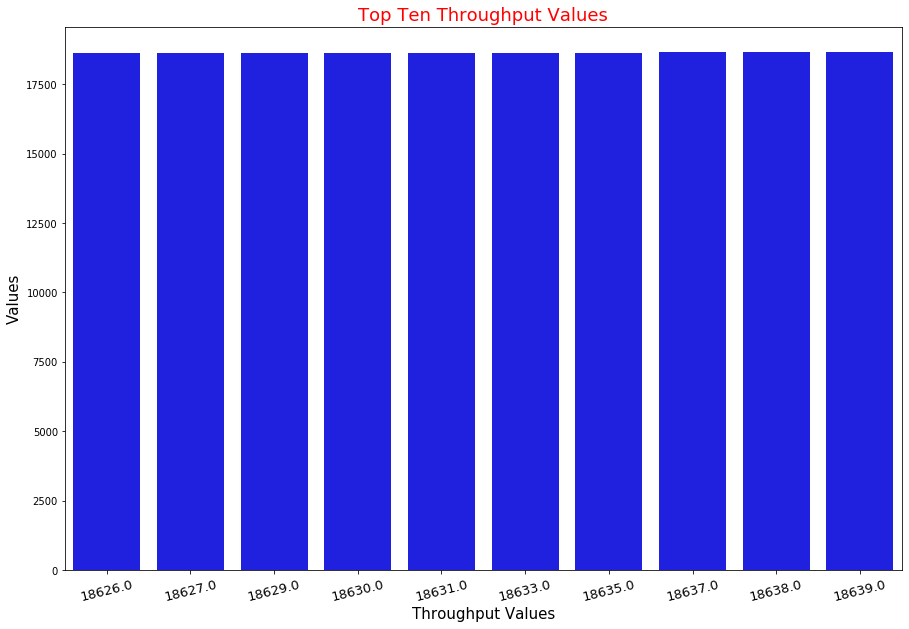

In [167]:
plt.subplots(figsize=(15,10))
sns.barplot(x='tp_values', y='tp_values' ,data = top10_tp, color='b')
plt.title( 'Top Ten Throughput Values', fontsize=18, color='r')
plt.xlabel('Throughput Values', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.xticks(fontsize=13, rotation=14)
plt.savefig('visuals/user_experience/top10tp.png', format='png')

Observation

> All top Tens in the Network Parameters Values are in the same range

#### Bottom Ten

In [168]:
bottom10_tcp = tcp_values.tcp_values.drop_duplicates().nsmallest(10).reset_index()

In [169]:
bottom10_tcp

,index,tcp_values
0,143594,86.0
1,111100,97.0
2,18417,106.0
3,13142,108.0
4,97061,113.0
5,8794,128.0
6,99947,129.0
7,83214,134.0
8,12849,143.0
9,50013,173.0


1. Bottom 10 TCP retransmission

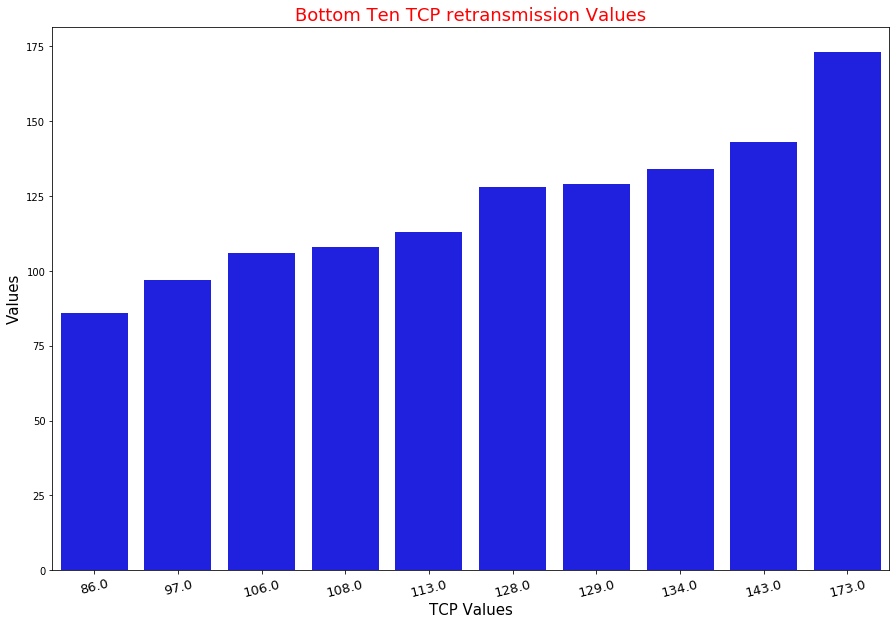

In [170]:
plt.subplots(figsize=(15,10))
sns.barplot(x='tcp_values', y='tcp_values' ,data = bottom10_tcp, color='b') #order=avg_tcp.msisdn_number)
plt.title( 'Bottom Ten TCP retransmission Values', fontsize=18, color='r')
plt.xlabel('TCP Values', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.xticks(fontsize=13, rotation=14)
plt.savefig('visuals/user_experience/bottom10tcp.png', format='png')

2. Bottom 10 RTT

In [171]:
bottom10_rtt = rtt_values.rtt_values.drop_duplicates().nsmallest(10).reset_index()

In [172]:
bottom10_rtt

,index,rtt_values
0,123210,6.0
1,51364,7.0
2,43760,8.0
3,41321,9.0
4,49429,10.0
5,103604,11.0
6,122248,12.0
7,123960,13.0
8,50829,14.0
9,128729,15.0


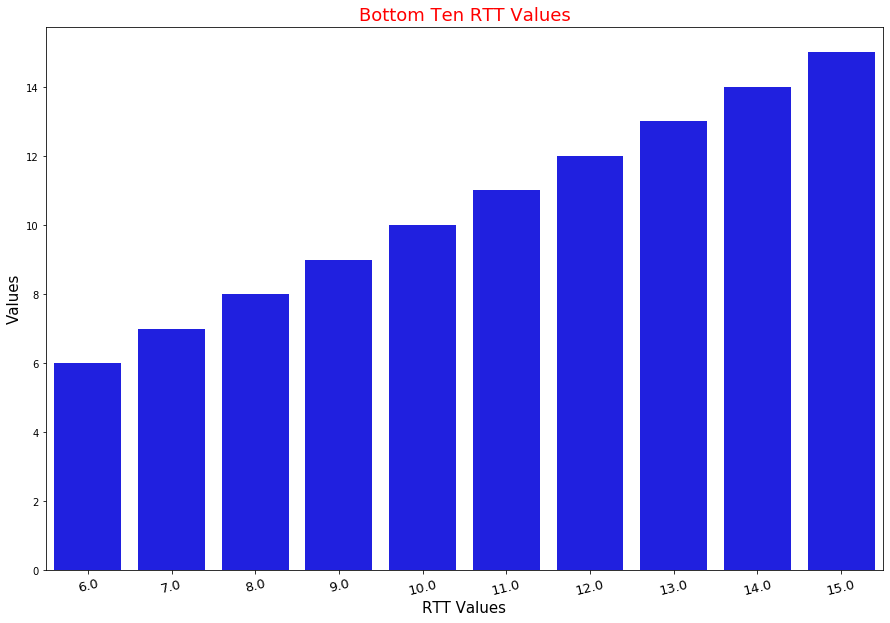

In [173]:
plt.subplots(figsize=(15,10))
sns.barplot(x='rtt_values', y='rtt_values' ,data = bottom10_rtt, color='b')
plt.title( 'Bottom Ten RTT Values', fontsize=18, color='r')
plt.xlabel('RTT Values', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.xticks(fontsize=13, rotation=14)
plt.savefig('visuals/user_experience/bottom10rtt.png', format='png')

3. Bottom Throughput Values

In [174]:
bottom10_tp = tp_values.tp_values.drop_duplicates().nsmallest(10).reset_index()

In [175]:
bottom10_tp

,index,tp_values
0,116118,0.0
1,56180,1.0
2,20548,2.0
3,92791,3.0
4,23674,4.0
5,17454,5.0
6,22221,6.0
7,116925,7.0
8,87284,8.0
9,21144,9.0


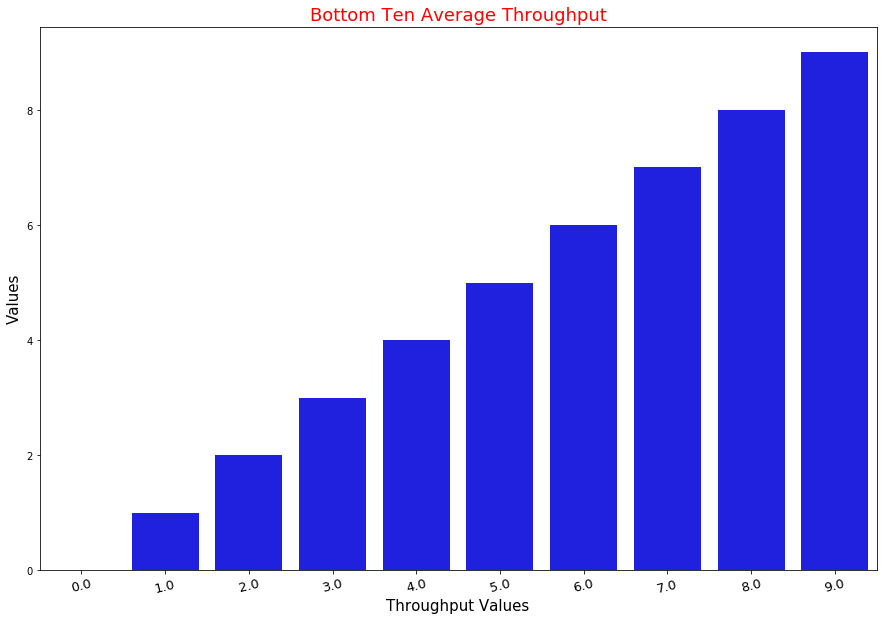

In [176]:
plt.subplots(figsize=(15,10))
sns.barplot(x='tp_values', y='tp_values' ,data = bottom10_tp, color='b')
plt.title( 'Bottom Ten Average Throughput', fontsize=18, color='r')
plt.xlabel('Throughput Values', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.xticks(fontsize=13, rotation=14)
plt.savefig('visuals/user_experience/bottom10tp.png', format='png')

> There are users with no throuhgput 

#### Most Frequent

1. TCP Most Frequent

In [177]:
tcp_values.tcp_values.mode()

0    1.235566e+06
dtype: float64

2. Throughput Most Frequent

In [178]:
tp_values.tp_values.mode()

0    7099.04626
dtype: float64

3. RTT Most Frequent

In [179]:
rtt_values.rtt_values.mode()

0    54.61309
dtype: float64

#### Handsets Distribution 

d. The distribution of the average throughput per handset type and provide interpretation for your findings.

e. The average TCP retransmission view per handset type and provide interpretation for your findings.

In [180]:
working_data.head(0)

,bearer_id,imsi,msisdn_number,imei,avg_rtt_ms,avg_bearer_tp_kbps,total_tcp_retrans__vol__bytes_,handset_manufacturer,handset_type,totalXdr


In [181]:
handset_avg_trp = working_data.groupby('handset_type')['avg_bearer_tp_kbps'].mean().reset_index(name='handset_avg_trp')

In [182]:
handset_avg_trp.sort_values(by='handset_avg_trp', ascending=False)

,handset_type,handset_avg_trp
286,htc desire 728,18618.0
339,huawei e5220s-2,18540.0
383,huawei jkm-lx1,18274.0
1212,tct mobile suzho. alcatel onetouch pop d5,17774.0
904,samsung galaxy mega duos (gt-i9152),17474.0
...,...,...
172,concox informati. concox gt06 gt06n tr06,2.0
803,quectel wireless. quectel ec21-e,2.0
804,quectel wireless. quectel ec25-e,1.0
1254,wct uno,0.0


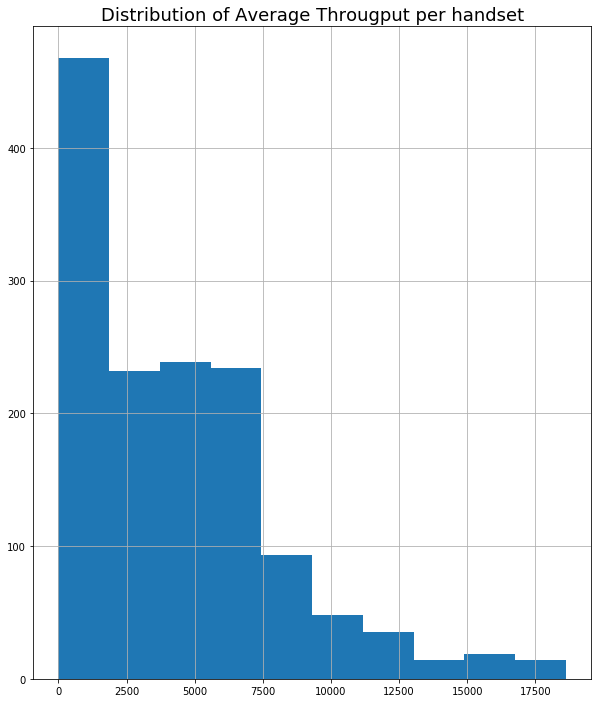

In [183]:
handset_avg_trp.hist(figsize=(10, 12))
plt.title('Distribution of Average Througput per handset', fontsize=18)
plt.savefig('visuals/user_experience/distrotrpHandset.png', format='png')

> Interpretaion;

The distribution is right skewed 

This means that there are more handset owners who have below average throughput 

THere are handset owners with no throughput 

In [184]:
handset_avg_tcp = working_data.groupby('handset_type')['total_tcp_retrans__vol__bytes_'].mean().reset_index(name='handset_avg_tcp')

In [185]:
handset_avg_tcp.sort_values(by='handset_avg_tcp', ascending=False)

,handset_type,handset_avg_tcp
666,meizu technology. pro 6s,2098123.0
926,samsung galaxy on5 (sm-g550x),2022550.0
298,htc one mini 2,1984619.0
665,meizu technology. pro 6 plus,1890118.0
587,lg lg-h818p,1886479.5
...,...,...
761,oppo a37f,2377.0
551,lenovo moto x play,1817.0
233,gotron (hk) elec. armor x,1500.0
917,samsung galaxy note 8 (sm-n9500),418.0


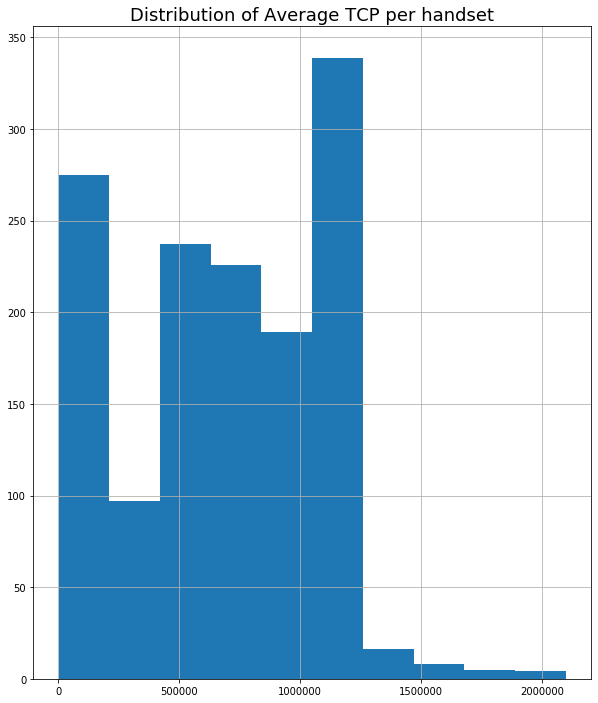

In [186]:
handset_avg_tcp.hist(figsize=(10, 12))
plt.title('Distribution of Average TCP per handset', fontsize=18)
plt.savefig('visuals/user_experience/distrotcpHandset.png', format='png')

The distribution is right skewed 

This means that there are more handset owners who have below average TCP 

THere are handset owners with no throughput 

##### Research Question 3

- Customer Clustering

- - Using the experience metrics above, perform a ​ k-​ means clustering (where ​ k =3) 

    to segment users into groups of experiences and provide a brief description of each cluster.




> Gather experience metrics

In [187]:
working_data.head(0)

,bearer_id,imsi,msisdn_number,imei,avg_rtt_ms,avg_bearer_tp_kbps,total_tcp_retrans__vol__bytes_,handset_manufacturer,handset_type,totalXdr


In [232]:
exp_metrics_no_cluster = working_data.groupby('msisdn_number').aggregate({'avg_rtt_ms':'sum','avg_bearer_tp_kbps':'sum',
                                                              'total_tcp_retrans__vol__bytes_':'sum',
                                                              'handset_type':'count'})

In [233]:
exp_metrics_no_cluster = exp_metrics_no_cluster.reset_index()

In [234]:
exp_metrics_no_cluster

,msisdn_number,avg_rtt_ms,avg_bearer_tp_kbps,total_tcp_retrans__vol__bytes_,handset_type
0,3.360100e+10,46.000000,7.600000e+01,1.235566e+06,1
1,3.360100e+10,31.000000,9.900000e+01,1.235566e+06,1
2,3.360100e+10,54.613090,9.700000e+01,1.235566e+06,1
3,3.360101e+10,84.000000,2.480000e+02,3.301360e+04,1
4,3.360101e+10,119.000000,7.162046e+03,2.471132e+06,2
...,...,...,...,...,...
106852,3.379000e+10,40.000000,1.160000e+02,1.235566e+06,1
106853,4.188282e+10,58362.616409,4.652915e+06,7.750170e+08,1066
106854,3.197021e+12,54.613090,1.000000e+00,1.235566e+06,1
106855,3.370000e+14,54.613090,3.300000e+01,1.235566e+06,1


In [235]:
exp_metrics_no_cluster.columns = ['users', 'rtt_sum', 'trp_sum', 'tcp_sum', 'handset_count']

In [236]:
exp_metrics_no_cluster

,users,rtt_sum,trp_sum,tcp_sum,handset_count
0,3.360100e+10,46.000000,7.600000e+01,1.235566e+06,1
1,3.360100e+10,31.000000,9.900000e+01,1.235566e+06,1
2,3.360100e+10,54.613090,9.700000e+01,1.235566e+06,1
3,3.360101e+10,84.000000,2.480000e+02,3.301360e+04,1
4,3.360101e+10,119.000000,7.162046e+03,2.471132e+06,2
...,...,...,...,...,...
106852,3.379000e+10,40.000000,1.160000e+02,1.235566e+06,1
106853,4.188282e+10,58362.616409,4.652915e+06,7.750170e+08,1066
106854,3.197021e+12,54.613090,1.000000e+00,1.235566e+06,1
106855,3.370000e+14,54.613090,3.300000e+01,1.235566e+06,1


In [237]:
exp_metrics = exp_metrics_no_cluster.drop(columns='users')# inplace=True)

In [239]:
exp_metrics

,rtt_sum,trp_sum,tcp_sum,handset_count
0,46.000000,7.600000e+01,1.235566e+06,1
1,31.000000,9.900000e+01,1.235566e+06,1
2,54.613090,9.700000e+01,1.235566e+06,1
3,84.000000,2.480000e+02,3.301360e+04,1
4,119.000000,7.162046e+03,2.471132e+06,2
...,...,...,...,...
106852,40.000000,1.160000e+02,1.235566e+06,1
106853,58362.616409,4.652915e+06,7.750170e+08,1066
106854,54.613090,1.000000e+00,1.235566e+06,1
106855,54.613090,3.300000e+01,1.235566e+06,1


> Normalise metrics values with MinMaxScaler

In [240]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [241]:
scaler.fit(exp_metrics)

MinMaxScaler()

In [242]:
scaled_metrics = scaler.transform(exp_metrics)

In [243]:
scaled_metrics

array([[6.85440700e-04, 1.63338479e-05, 1.59411848e-03, 0.00000000e+00],
       [4.28400437e-04, 2.12769861e-05, 1.59411848e-03, 0.00000000e+00],
       [8.33034762e-04, 2.08471480e-05, 1.59411848e-03, 0.00000000e+00],
       ...,
       [8.33034762e-04, 2.14919051e-07, 1.59411848e-03, 0.00000000e+00],
       [8.33034762e-04, 7.09232869e-06, 1.59411848e-03, 0.00000000e+00],
       [8.33034762e-04, 4.29838103e-07, 1.59411848e-03, 0.00000000e+00]])

> Perform K-means on Scaled metrics values

In [244]:
km = KMeans()
km

KMeans()

> find optimal k! - using the elbow method

In [245]:
wwsm = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_metrics)
    wwsm.append(km.inertia_)

In [246]:
wwsm

[4.484638465306629,
 0.49269012241809895,
 0.30604064580799606,
 0.2281337556570849,
 0.1619471336608694,
 0.13911241850060913,
 0.11677768532301154,
 0.10236350790802527,
 0.09086099355520556,
 0.08355843545132552]

> Plot WIthin Sum of Squared Distances

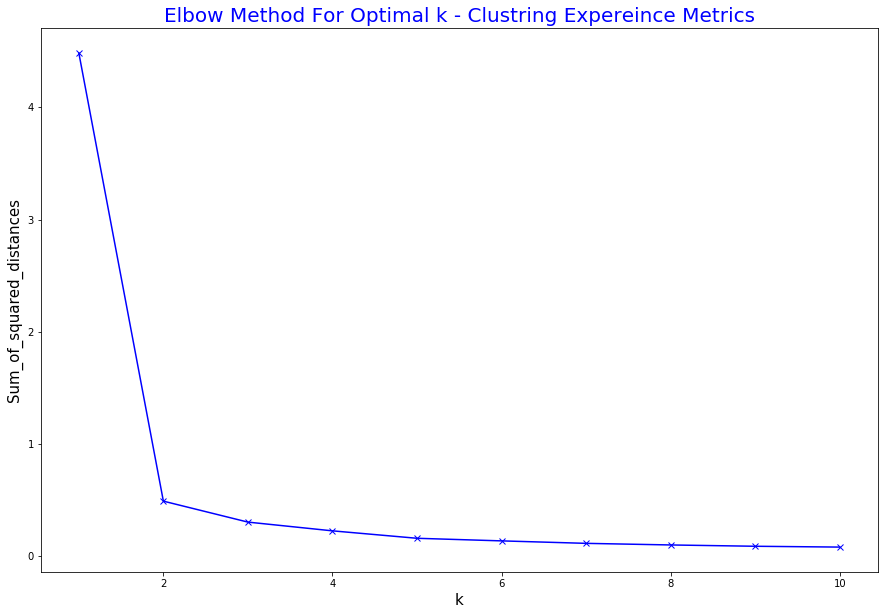

In [202]:
plt.subplots(figsize=(15, 10))
plt.plot(K, wwsm, 'bx-')
plt.xlabel('k', fontsize=15)
plt.ylabel('Sum_of_squared_distances', fontsize=15)
plt.title('Elbow Method For Optimal k - Clustring Expereince Metrics', fontsize=20, color='b')
plt.savefig("visuals/user_experience/optimalK.png", format="png")
plt.show()

> Get clusters for Scaled Metrics

In [247]:
km2 = KMeans(n_clusters = 3)
clusters = km2.fit(scaled_metrics).cluster_centers_

In [248]:
clusters

array([[9.11436952e-04, 5.59664193e-04, 1.51147162e-03, 1.90698517e-04],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.06346856e-03, 2.96727463e-03, 4.09953964e-03, 2.13773397e-03]])

> Get labels

In [249]:
set(km2.labels_)

{0, 1, 2}

> Assign labels to metrics

In [250]:
exp_metrics['clusters'] = km2.labels_

In [251]:
exp_metrics

,rtt_sum,trp_sum,tcp_sum,handset_count,clusters
0,46.000000,7.600000e+01,1.235566e+06,1,0
1,31.000000,9.900000e+01,1.235566e+06,1,0
2,54.613090,9.700000e+01,1.235566e+06,1,0
3,84.000000,2.480000e+02,3.301360e+04,1,0
4,119.000000,7.162046e+03,2.471132e+06,2,0
...,...,...,...,...,...
106852,40.000000,1.160000e+02,1.235566e+06,1,0
106853,58362.616409,4.652915e+06,7.750170e+08,1066,1
106854,54.613090,1.000000e+00,1.235566e+06,1,0
106855,54.613090,3.300000e+01,1.235566e+06,1,0


> save expereince cluster as csv

In [263]:
experience_cluster=exp_metrics.merge(exp_metrics_no_cluster.users, how='inner',right_index=True, left_index=True, )

In [265]:
experience_cluster

,rtt_sum,trp_sum,tcp_sum,handset_count,clusters,users
0,46.000000,7.600000e+01,1.235566e+06,1,0,3.360100e+10
1,31.000000,9.900000e+01,1.235566e+06,1,0,3.360100e+10
2,54.613090,9.700000e+01,1.235566e+06,1,0,3.360100e+10
3,84.000000,2.480000e+02,3.301360e+04,1,0,3.360101e+10
4,119.000000,7.162046e+03,2.471132e+06,2,0,3.360101e+10
...,...,...,...,...,...,...
106852,40.000000,1.160000e+02,1.235566e+06,1,0,3.379000e+10
106853,58362.616409,4.652915e+06,7.750170e+08,1066,1,4.188282e+10
106854,54.613090,1.000000e+00,1.235566e+06,1,0,3.197021e+12
106855,54.613090,3.300000e+01,1.235566e+06,1,0,3.370000e+14


In [267]:
experience_cluster.to_csv('experience_cluster.csv')

Plot CLusters on 3D

In [208]:
len(scaled_metrics)

106857

/home/patrick/.local/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


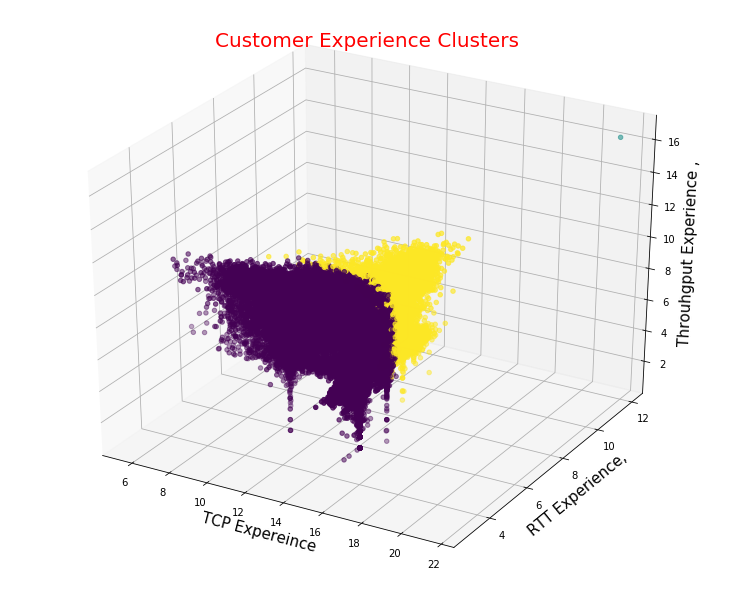

In [209]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
ax.set_title('Customer Experience Clusters', fontsize=20, color='r')
ax.scatter(xs=np.log(exp_metrics.tcp_sum)+1, ys= np.log(exp_metrics.rtt_sum)+1,
          zs= np.log(exp_metrics.trp_sum)+1, c=km2.labels_)
# ax.scatter(xs=scaled_metrics[:,0], ys= scaled_metrics[:,1],
#            zs= scaled_metrics[:,2], c=km2.labels_)
ax.set_xlabel('TCP Expereince', fontsize=15)
ax.set_ylabel('RTT Experience,', fontsize=15)
ax.set_zlabel('Throuhgput Experience ,', fontsize=15)
plt.savefig("visuals/user_experience/expClusters3D.png", format="png")
plt.show()

> Group by Clusters

- Find minimum, maximum, average and total non-normalized metrics for each clusters

In [210]:
exp_metrics.head(0)

,rtt_sum,trp_sum,tcp_sum,handset_count,clusters


> RTT Experience

In [211]:
rtt_exp = exp_metrics.groupby('clusters')['rtt_sum'].aggregate(['min', 'max', 'mean', 'sum']).reset_index(drop=True)

In [212]:
rtt_exp = rtt_exp.apply(lambda x: np.log(x)).sort_values(by='mean', ascending=False)

In [213]:
rtt_exp

,min,max,mean,sum
1,10.974431,10.974431,10.974431,10.974431
2,3.871201,6.900341,5.205230,14.436549
0,1.791759,5.549076,4.076819,15.555608


<Figure size 3600x4320 with 0 Axes>

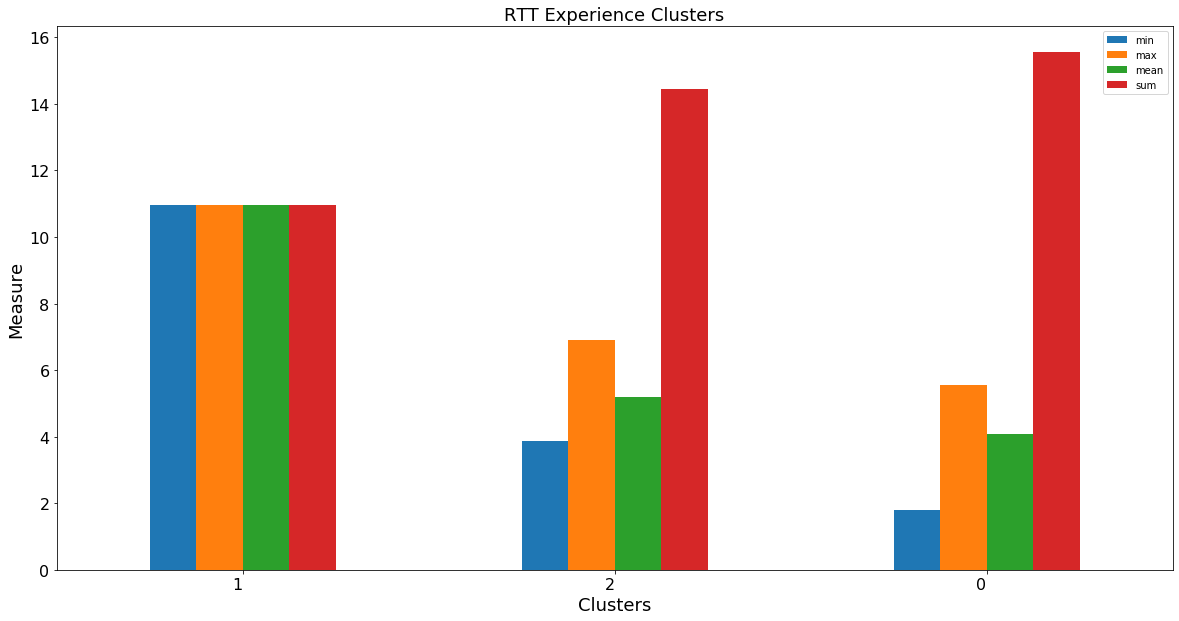

In [214]:
plt.figure(figsize=(50,60))
# topAppsAggLog.plot(figsize=(5,5));
ax= rtt_exp.plot.bar(figsize=(20,10))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0, 
    horizontalalignment='right'
)
plt.title("RTT Experience Clusters", fontsize=18)
plt.xticks(fontsize=16, rotation =0)
plt.yticks(fontsize=16) 
plt.xlabel('Clusters', fontsize=18)
plt.ylabel('Measure', fontsize=18)
plt.savefig("visuals/user_experience/RTTClusters.png", format="png")
plt.show()

#### Interpretation

> On average customers in clusters have better RTT expereince than other clusters - There is a uniform distribution

> Customers in cluster 0 on average have the lowest RTT experience but interestingly have the highest RTT output

> Throughput Experience

In [215]:
trp_exp = exp_metrics.groupby('clusters')['trp_sum'].aggregate(['min', 'max', 'mean', 'sum']).reset_index(drop=True)

In [216]:
trp_exp = trp_exp.apply(lambda x: np.log(x)).sort_values(by='mean', ascending=False)

/home/patrick/.local/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [217]:
trp_exp

,min,max,mean,sum
1,15.353004,15.353004,15.353004,15.353004
2,2.397895,11.552022,9.521925,18.753244
0,-inf,10.155220,7.853743,19.332533


<Figure size 3600x4320 with 0 Axes>

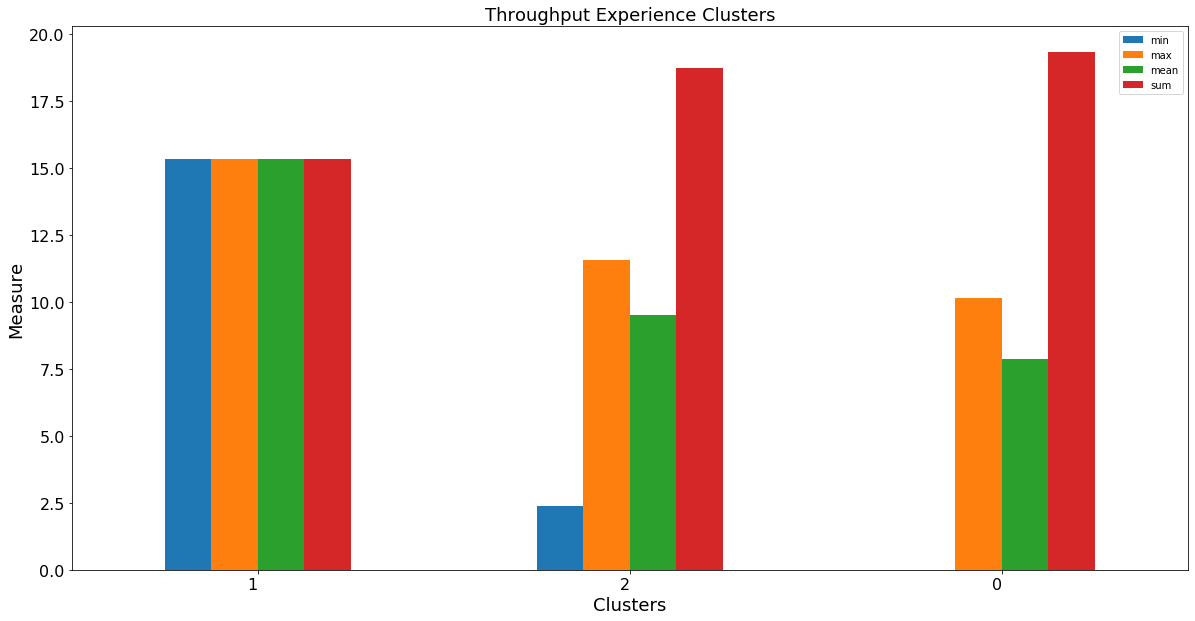

In [218]:
plt.figure(figsize=(50,60))
# topAppsAggLog.plot(figsize=(5,5));
ax= trp_exp.plot.bar(figsize=(20,10))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0, 
    horizontalalignment='right'
)
plt.title("Throughput Experience Clusters", fontsize=18)
plt.xticks(fontsize=16, rotation =0)
plt.yticks(fontsize=16) 
plt.xlabel('Clusters', fontsize=18)
plt.ylabel('Measure', fontsize=18)
plt.savefig("visuals/user_experience/TRPClusters.png", format="png")
plt.show()

#### Interpretation

> On average customers in clusters have better Throughput expereince than other clusters - There is a uniform distribution

> Customers in cluster 0 on average have the lowest Throughput experience but interestingly have the highest TRP output

> TCP Experience

In [219]:
tcp_exp = exp_metrics.groupby('clusters')['tcp_sum'].aggregate(['min', 'max', 'mean', 'sum']).reset_index(drop=True)

In [220]:
tcp_exp = tcp_exp.apply(lambda x: np.log(x)).sort_values(by='mean', ascending=False)

In [221]:
tcp_exp

,min,max,mean,sum
1,20.468396,20.468396,20.468396,20.468396
2,8.872067,16.669911,14.957374,24.188692
0,4.574711,15.036760,13.971015,25.449804


<Figure size 3600x4320 with 0 Axes>

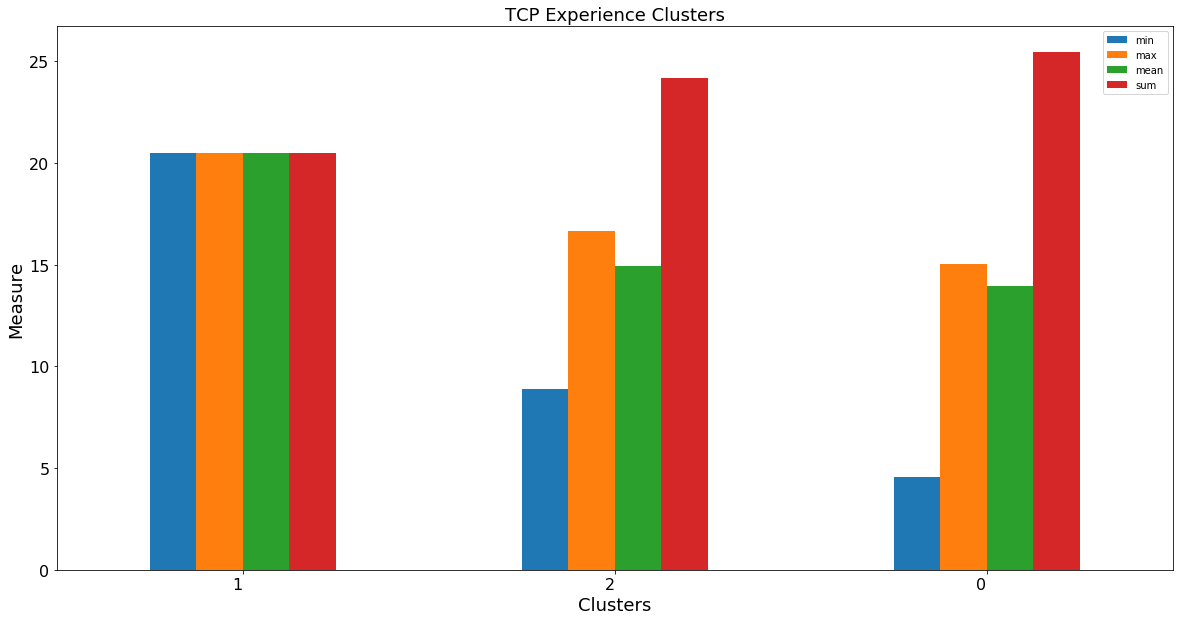

In [222]:
plt.figure(figsize=(50,60))
# topAppsAggLog.plot(figsize=(5,5));
ax= tcp_exp.plot.bar(figsize=(20,10))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0, 
    horizontalalignment='right'
)
plt.title("TCP Experience Clusters", fontsize=18)
plt.xticks(fontsize=16, rotation =0)
plt.yticks(fontsize=16) 
plt.xlabel('Clusters', fontsize=18)
plt.ylabel('Measure', fontsize=18)
plt.savefig("visuals/user_experience/TCPClusters.png", format="png")
plt.show()

#### Interpretation

> On average customers in clusters have better TCP Transmission expereince than other clusters - There is a uniform distribution

> Customers in cluster 0 on average have the lowest TCP Transmission  experience but interestingly have the highest TCP output

> Handset Experience

In [223]:
hands_exp = exp_metrics.groupby('clusters')['handset_count'].aggregate(['min', 'max', 'mean', 'sum']).reset_index(drop=True)

In [224]:
hands_exp = hands_exp.apply(lambda x: np.log(x)).sort_values(by='mean', ascending=False)

In [225]:
hands_exp

,min,max,mean,sum
1,6.971669,6.971669,6.971669,6.971669
2,0.000000,2.890372,1.173974,10.405293
0,0.000000,1.386294,0.181702,11.660492


<Figure size 3600x4320 with 0 Axes>

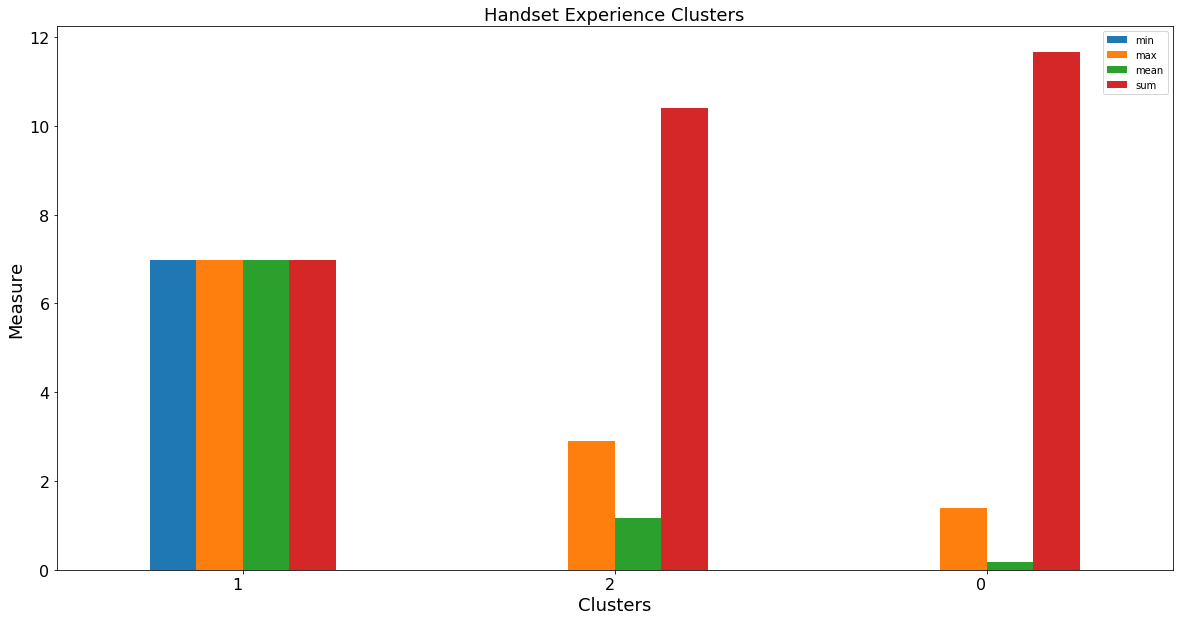

In [226]:
plt.figure(figsize=(50,60))
# topAppsAggLog.plot(figsize=(5,5));
ax= hands_exp.plot.bar(figsize=(20,10))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0, 
    horizontalalignment='right'
)
plt.title("Handset Experience Clusters", fontsize=18)
plt.xticks(fontsize=16, rotation =0)
plt.yticks(fontsize=16) 
plt.xlabel('Clusters', fontsize=18)
plt.ylabel('Measure', fontsize=18)
plt.savefig("visuals/user_experience/HandsetClusters.png", format="png")
plt.show()

#### Interpretation

> On average customers in clusters have better Handset expereince than other clusters - There is a uniform distribution

> Customers in cluster 0 on average have the lowest Handset expereince but interestingly have the highest count of handsets and lowest count of handsets